In [ ]:
#1. Libraries needed for the project

import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#2. Initialize some variables that we will modify later.

hostnames = []
dataset = []
df = None

In [3]:
#3. Create a function to generate hostnames based on rules.
def set_hostnames(number_of_hosts:int) -> None:
    sistema_operativo = ['L']*40 + ['S']*30 + ['A']*20 + ['H']*10
    entorno = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30
    pais = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30
    grupos_alpha = []
    
    for i in range(number_of_hosts):
        lista_so = random.choice(sistema_operativo) + random.choice(entorno) + random.choice(pais)
        grupos_alpha.append(lista_so)
        lista_so += str(grupos_alpha.count(lista_so)).zfill(3)
        hostnames.append(lista_so)

In [4]:
#4. Create a function to get the OS name.
def get_os(hostname: str) -> str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknow'

In [5]:
#5. Create a function to obtain the name of the environment.
def get_environment(hostname: str) -> str:
    if hostname[1] == 'D':
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    else:
        return 'Unknow'

In [6]:
#6. We create a function to get the name of the country.
def get_country(hostname:str) -> str:
    if hostname[2:5] == 'NOR':
        return 'Norway'
    if hostname[2:5] == 'FRA':
        return 'France'
    if hostname[2:5] == 'ITA':
        return 'Italy'
    if hostname[2:5] == 'ESP':
        return 'Spain'
    if hostname[2:5] == 'DEU':
        return 'Germany'
    if hostname[2:5] == 'IRL':
        return 'Ireland'

In [7]:
#7. Create a function to generate the DataFrame.
def set_dataframe(count: int) -> None:
    global df
    
    set_hostnames(count)

    for hostname in hostnames:
        dataset.append({
            'hostname': hostname,
            'os': get_os(hostname),
            'environment': get_environment(hostname),
            'country': get_country(hostname),
            'node': int(hostname[-3:])
        })

    df = pd.DataFrame(dataset)

In [8]:
#8. Create the DataFrame.
set_dataframe(1500)

In [9]:
df

,hostname,os,environment,country,node
0,SDDEU001,Solaris,Development,Germany,1
1,SDDEU002,Solaris,Development,Germany,2
2,STDEU001,Solaris,Testing,Germany,1
3,LTIRL001,Linux,Testing,Ireland,1
4,HSIRL001,HP-UX,Staging,Ireland,1
...,...,...,...,...,...
1495,HTDEU008,HP-UX,Testing,Germany,8
1496,LTNOR009,Linux,Testing,Norway,9
1497,SIDEU010,Solaris,Integration,Germany,10
1498,APESP015,AIX,Production,Spain,15


In [10]:
df.head(30)

,hostname,os,environment,country,node
0,SDDEU001,Solaris,Development,Germany,1
1,SDDEU002,Solaris,Development,Germany,2
2,STDEU001,Solaris,Testing,Germany,1
3,LTIRL001,Linux,Testing,Ireland,1
4,HSIRL001,HP-UX,Staging,Ireland,1
5,SPIRL001,Solaris,Production,Ireland,1
6,LIIRL001,Linux,Integration,Ireland,1
7,STIRL001,Solaris,Testing,Ireland,1
8,ATITA001,AIX,Testing,Italy,1
9,HSESP001,HP-UX,Staging,Spain,1


In [11]:
#9.  Save the generated DataFrame in a CSV file.
df.to_csv('hosts.csv', index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

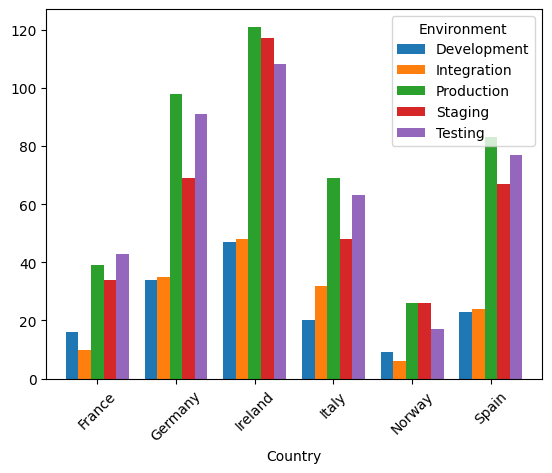

In [12]:
#10. Generate a single graph, grouping the environments for each country.
df_grouped = df.groupby(['country','environment']).size().unstack()
df_grouped.plot(kind='bar', width = 0.8)
plt.xlabel('Country')
plt.ylabel('')
plt.legend(title='Environment', loc = 'upper right')
plt.xticks(rotation=45)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

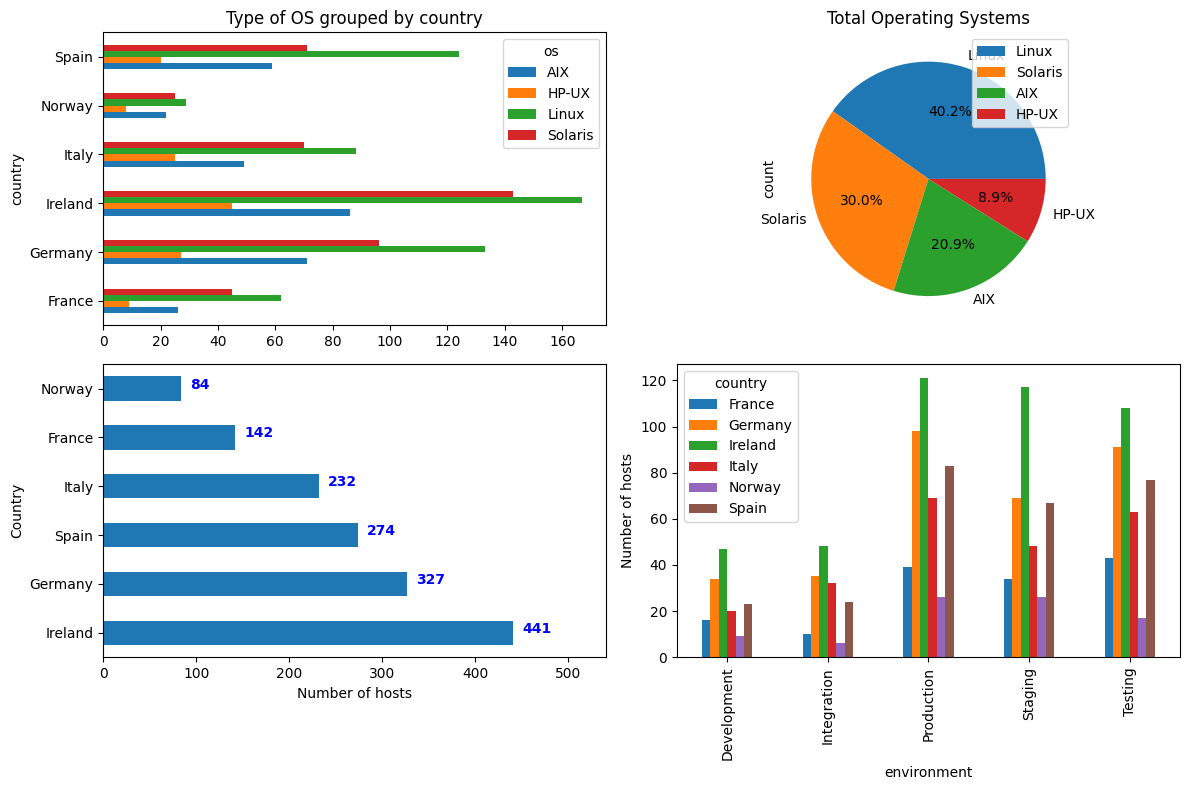

In [13]:
#11. Create a figure with four graphs on a 2 x 2 mesh.
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
df.groupby(['country', 'os']).size().unstack().plot(kind='barh', ax=axs[0, 0])
axs[0, 0].set_title('Type of OS grouped by country')

df['os'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[0, 1])
axs[0, 1].set_title('Total Operating Systems')
axs[0, 1].legend()

host_counts = df['country'].value_counts()
host_counts.plot(kind='barh', ax=axs[1, 0])
axs[1, 0].set_xlabel('Number of hosts')
axs[1, 0].set_ylabel('Country')
for i, v in enumerate(host_counts):
    axs[1, 0].text(v + 10, i, str(v), color='blue', fontweight='bold')
axs[1, 0].set_xlim(0, host_counts.max() + 100)

df.groupby(['country', 'environment']).size().unstack(0).plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_ylabel('Number of hosts')

plt.tight_layout()
plt.show